In [1]:
#
import json
import requests as req
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import numpy as np

In [2]:
#%%
base_url = 'http://api.openweathermap.org/data/2.5/weather'
APIKEY = '3b6fc998272abf055734591058b4c655'
#%%

In [3]:
__cities = []
query_units = 'imperial'
weather_info = []
__max_temp = []
__humidity = []
__wind_speed = []
__lon = []
__lat = []
__cloudiness  = []
__qcities  = []
__country = []
__date = []

### Generate Cities List

In [4]:
#Generate city from random geographical coordinates
num_query=1500
name=[]
cod=[]
lt=180 * np.random.random_sample((num_query)) - 90 #latitude [-90, 90)
lg=360 * np.random.random_sample((num_query)) - 180 #longtitude [-180, 180)
geo_coord=list(zip(lt,lg))

for lat, lon in geo_coord:
    city=citipy.nearest_city(lat, lon)
    name.append(city.city_name)
    cod.append(city.country_code)

__qcities=list(zip(name, cod))
__qcities=list(set(__qcities)) #unique cities and country codes
len(__qcities)

609

### Perform API Calls

In [5]:
x=0
print('\n Beginning Data Retrieval\n'+'-'*26)
for qcity, qcd in __qcities:

    # Perform API Call
    query_url = base_url + '?apikey=' + APIKEY + \
        '&q=' + qcity + ',' + qcd + '&units=' + query_units
    weather_info.append(req.get(query_url).json())

    try:
        __cities.append(weather_info[x]['name'])
        rcity=qcity
    except KeyError:
        print('City of %s in %s not found' % (qcity.title(), qcd.upper()))
        #citipy error handler
        #pass
    else:
        print('Processing Record %s | %s '  % (x, rcity.title() ))
        print(query_url)
        __max_temp.append(weather_info[x]['main']['temp_max'])
        __humidity.append(weather_info[x]['main']['humidity'])
        __wind_speed.append(weather_info[x]['wind']['speed'])
        __lon.append(weather_info[x]['coord']['lon'])
        __lat.append(weather_info[x]['coord']['lat'])
        __cloudiness.append(weather_info[x]['clouds']['all'])
        __country.append(weather_info[x]['sys']['country'])
        __date.append(weather_info[x]['dt'])
    
    x+=1

print('\n'+ '-'*28+'\n Data Retrieval complete\n'+'-'*28)
weather_info = {"Temperature": __max_temp, 
                "Humidity": __humidity,
                "Wind Speed": __wind_speed,
                'Lat': __lat,
                'Lng': __lon,
                'Cloudiness': __cloudiness,
                'City': __cities,
                'Country': __country,
                'Date': __date}

weather_info = pd.DataFrame(weather_info)


 Beginning Data Retrieval
--------------------------
Processing Record 0 | Roald 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=roald,no&units=imperial
Processing Record 1 | Benito Juarez 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=benito juarez,mx&units=imperial
Processing Record 2 | Dioknisi 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=dioknisi,ge&units=imperial
City of Meyungs in PW not found
Processing Record 4 | Cururupu 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=cururupu,br&units=imperial
Processing Record 5 | Fort Nelson 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=fort nelson,ca&units=imperial
Processing Record 6 | Tuktoyaktuk 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=tuktoyaktuk,ca&units=imperial
Processing

Processing Record 57 | Luderitz 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=luderitz,na&units=imperial
Processing Record 58 | Nguruka 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=nguruka,tz&units=imperial
Processing Record 59 | Ilawa 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=ilawa,pl&units=imperial
Processing Record 60 | Sabang 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=sabang,id&units=imperial
Processing Record 61 | Xingyi 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=xingyi,cn&units=imperial
Processing Record 62 | Nikolskoye 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=nikolskoye,ru&units=imperial
Processing Record 63 | Rocha 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q

Processing Record 116 | Tartagal 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=tartagal,ar&units=imperial
Processing Record 117 | Ayyampettai 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=ayyampettai,in&units=imperial
Processing Record 118 | Phibun Mangsahan 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=phibun mangsahan,th&units=imperial
Processing Record 119 | Emerald 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=emerald,au&units=imperial
Processing Record 120 | Vao 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=vao,nc&units=imperial
Processing Record 121 | Sobolevo 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=sobolevo,ru&units=imperial
Processing Record 122 | Hithadhoo 
http://api.openweathermap.org/data/2.5/weather?apikey=3

City of Halalo in WF not found
Processing Record 175 | Alugan 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=alugan,ph&units=imperial
Processing Record 176 | Mnogovershinnyy 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=mnogovershinnyy,ru&units=imperial
Processing Record 177 | Wattegama 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=wattegama,lk&units=imperial
Processing Record 178 | Ketchikan 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=ketchikan,us&units=imperial
Processing Record 179 | Iquique 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=iquique,cl&units=imperial
Processing Record 180 | Burgeo 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=burgeo,ca&units=imperial
Processing Record 181 | Isangel 
http://api.openweathermap.or

City of Utiroa in KI not found
Processing Record 236 | Pimenta Bueno 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=pimenta bueno,br&units=imperial
City of Bokspits in BW not found
Processing Record 238 | Thompson 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=thompson,ca&units=imperial
Processing Record 239 | Bucerias 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=bucerias,mx&units=imperial
City of Tongsa in BT not found
Processing Record 241 | Kualakapuas 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=kualakapuas,id&units=imperial
Processing Record 242 | Giyani 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=giyani,za&units=imperial
Processing Record 243 | Pevek 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=pevek,ru&units=imperial

Processing Record 297 | Waddan 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=waddan,ly&units=imperial
Processing Record 298 | Aitape 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=aitape,pg&units=imperial
Processing Record 299 | Along 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=along,in&units=imperial
Processing Record 300 | Sola 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=sola,vu&units=imperial
Processing Record 301 | Tura 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=tura,ru&units=imperial
Processing Record 302 | Vinces 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=vinces,ec&units=imperial
Processing Record 303 | Gladstone 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=gladstone,

Processing Record 360 | Takoradi 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=takoradi,gh&units=imperial
Processing Record 361 | Agirish 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=agirish,ru&units=imperial
Processing Record 362 | Shakawe 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=shakawe,bw&units=imperial
City of Makung in TW not found
Processing Record 364 | Staryy Nadym 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=staryy nadym,ru&units=imperial
Processing Record 365 | Lagoa 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=lagoa,pt&units=imperial
Processing Record 366 | El Dorado 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=el dorado,us&units=imperial
City of Jomalig in PH not found
Processing Record 368 | Oussouye 
htt

Processing Record 423 | Vardo 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=vardo,no&units=imperial
Processing Record 424 | Saint Augustine 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=saint augustine,us&units=imperial
City of Phan Rang in VN not found
Processing Record 426 | Santa Maria Da Boa Vista 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=santa maria da boa vista,br&units=imperial
City of Palabuhanratu in ID not found
Processing Record 428 | Beidao 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=beidao,cn&units=imperial
Processing Record 429 | Vaini 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=vaini,to&units=imperial
Processing Record 430 | Skelleftea 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=skelleftea,se&units=imp

Processing Record 483 | East London 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=east london,za&units=imperial
Processing Record 484 | Georgetown 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=georgetown,sh&units=imperial
Processing Record 485 | Hastings 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=hastings,us&units=imperial
Processing Record 486 | Koygorodok 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=koygorodok,ru&units=imperial
Processing Record 487 | Fortuna 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=fortuna,us&units=imperial
Processing Record 488 | Westport 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=westport,ie&units=imperial
Processing Record 489 | Kudahuvadhoo 
http://api.openweathermap.org/data/2.5/weather?api

Processing Record 544 | Porto Novo 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=porto novo,cv&units=imperial
Processing Record 545 | Kawalu 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=kawalu,id&units=imperial
Processing Record 546 | Machilipatnam 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=machilipatnam,in&units=imperial
Processing Record 547 | Biloela 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=biloela,au&units=imperial
Processing Record 548 | Pacific Grove 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=pacific grove,us&units=imperial
Processing Record 549 | Merrill 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=merrill,us&units=imperial
Processing Record 550 | Guerrero Negro 
http://api.openweathermap.org/data/2.5/weath

Processing Record 603 | Mogadouro 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=mogadouro,pt&units=imperial
Processing Record 604 | Bashtanka 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=bashtanka,ua&units=imperial
Processing Record 605 | Funadhoo 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=funadhoo,mv&units=imperial
City of Mirina in GR not found
City of Burica in PA not found
Processing Record 608 | Londoko 
http://api.openweathermap.org/data/2.5/weather?apikey=3b6fc998272abf055734591058b4c655&q=londoko,ru&units=imperial

----------------------------
 Data Retrieval complete
----------------------------


In [16]:
weather_info.to_csv('weather_info.csv')
weather_info.count()

City           539
Cloudiness     539
Country        539
Date           539
Humidity       539
Lat            539
Lng            539
Temperature    539
Wind Speed     539
dtype: int64

In [20]:
weather_info.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Wind Speed
0,Roald,36,NO,1514348400,74,62.58,6.12,35.60,17.22
1,Benito Juarez,24,MX,1514350711,67,28.64,-111.57,55.59,6.29
2,Dioknisi,0,GE,1514349000,57,41.63,42.39,53.60,28.86
3,Cururupu,48,BR,1514350712,92,-1.82,-44.87,77.55,3.94
4,Fort Nelson,90,CA,1514347200,76,58.81,-122.69,-11.21,3.36


### Latitude vs Temperature Plot

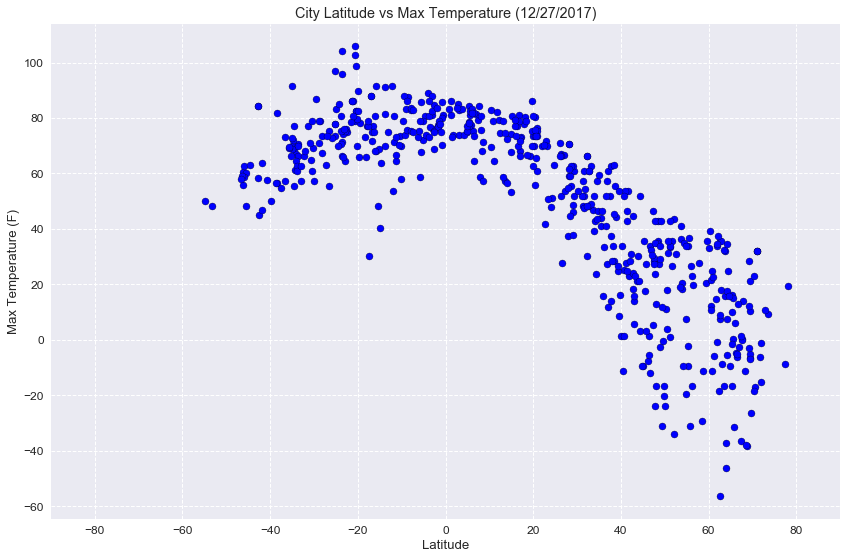

In [21]:
df=weather_info.set_index('Lat')
def plot_data(ylabels, uylabels, values):
    sns.set("notebook",font_scale=1.2)
    fig, ax=plt.subplots(figsize=(12,8), linewidth=0.1)

    ax.set_ylabel(ylabels + uylabels)
    ax.set_xlabel('Latitude')
    ax.set_title('City Latitude vs ' + ylabels + '(%s)' % (date.today().strftime('%m/%d/%Y')))
    ax.minorticks_on()
    ax.set_xlim(-90, 90)

    ax.grid(True,linestyle='dashed')
    ax.scatter(df.index, values, c='b', edgecolor='k')
    fig.tight_layout()
    plt.savefig('Latitude_vs_%s_(%s)' % (ylabels, date.today().strftime('%m-%d-%Y')))
    plt.show()

plot_data('Max Temperature ', '(F)', df['Temperature'])

#### Fig 1: Max Temperature increases from from approximately -58 degrees Latitude to 0 degrees Latitude, then take a sharp decrease between 0 and 80 degrees Latitude.

### Humidity vs Temperature Plot

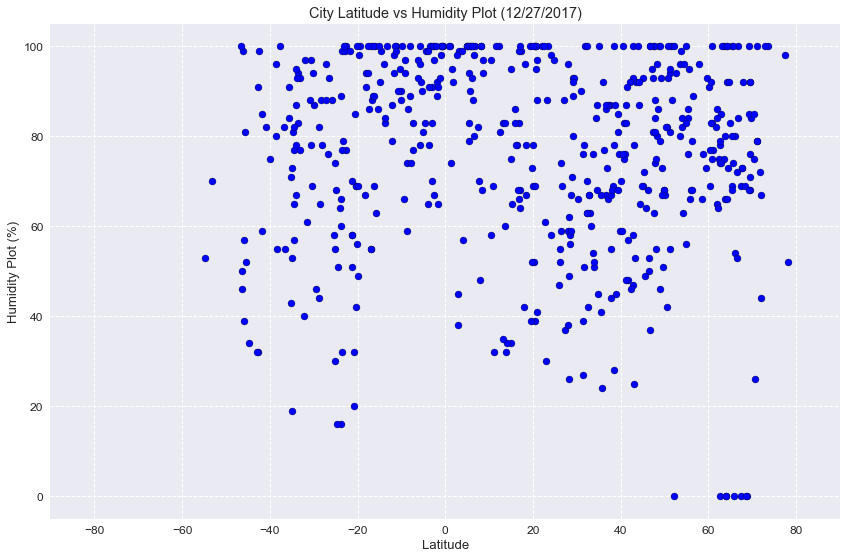

In [22]:
plot_data('Humidity Plot ', '(%)', df['Humidity'])

#### Fig 2: Humidity is relatively high between -40 and 80 degrees Latitude, but starts to decrease at about -50 degrees latitude.

### Cloudiness vs Temperature Plot

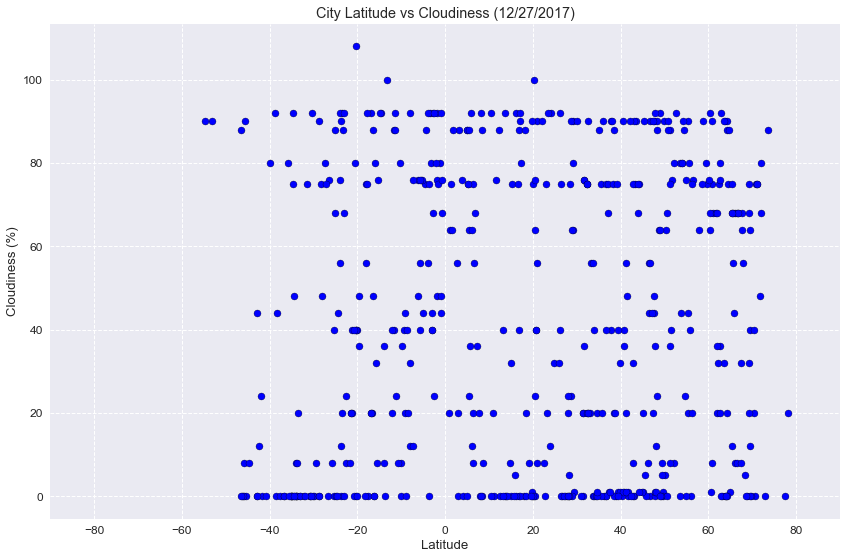

In [23]:
plot_data('Cloudiness ', '(%)', df['Cloudiness'])

#### Fig 3: Level of cloudiness is evenly distributed at -49 to 80 degrees Latitude, but seems to falll significantly and eventually to zero at < -40 degrees Latitude.

### Wind Speed vs Temperature Plot

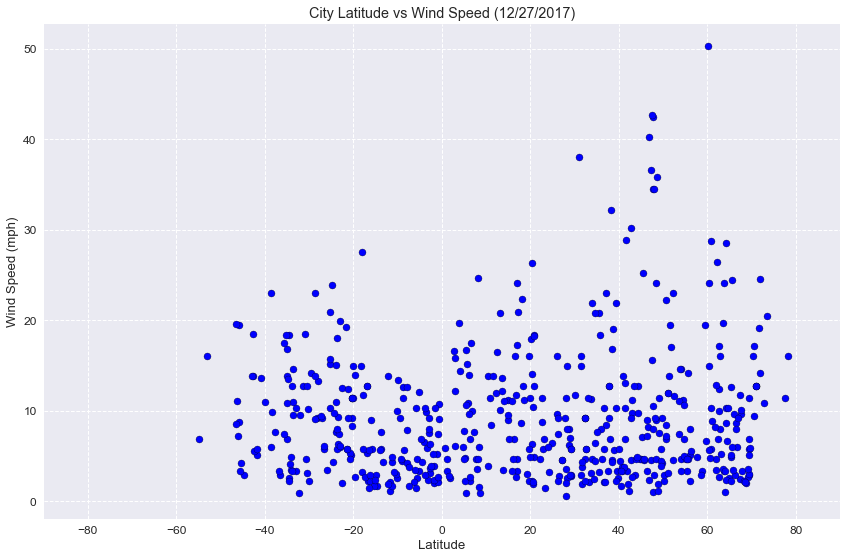

In [24]:
plot_data('Wind Speed ', '(mph)', df['Wind Speed'])

#### Fig 4: LAtitude doesn't seem to have an effect on wind speed as wind speed trends low with a few outliers occuring between 30 and 60 degrees Latitude.